In [8]:
import numpy as np
import csv
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
random.seed(42)
np.random.seed(42)

In [9]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier

In [11]:
from sklearn import linear_model

# Dataset 2: Linear Regression

In [12]:
file_path= os.path.expanduser('~/EE219/hw4/housing_data.csv')
df=pd.read_csv(file_path, sep=',',header=None)

In [13]:
print("MEDV\n", df.loc[0,13])
df[13]

MEDV
 24.0


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: 13, Length: 506, dtype: float64

In [14]:
df_y=df[13]
df=df.drop([13], axis = 1)

In [16]:
kf = KFold(n_splits=10,random_state=42,shuffle=True)
RMSE_train=[]
RMSE_test=[]
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
#     print(X_train)
#     print(y_train)
    reg = LinearRegression(normalize=True)
    reg.fit(X_train, y_train)
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
print('RMSE for train data=',mean(RMSE_train))
print('RMSE for test data=',mean(RMSE_test))

RMSE for train data= 4.670454144364911
RMSE for test data= 4.792992536004586


In [37]:
reg.coef_ 

array([-1.01889067e-01,  4.78657068e-02,  4.25242058e-02,  2.13065449e+00,
       -1.77470186e+01,  3.71996316e+00,  9.25223548e-03, -1.45616126e+00,
        2.91484760e-01, -1.27341960e-02, -9.58533414e-01,  9.34165225e-03,
       -5.67212111e-01])

In [ ]:
# 5th represent NOX: nitric oxides concentration (parts per 10 million)
# 7th represent AGE: proportion of owner-occupied units built prior to 1940

Text(0.5, 0, 'fitted valuse')

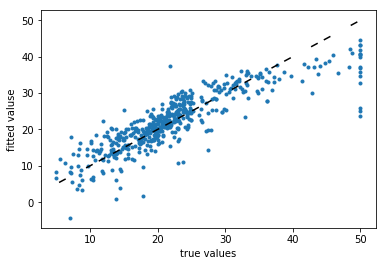

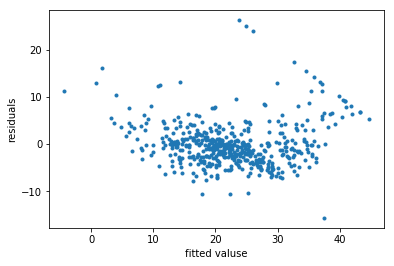

In [15]:
reg = LinearRegression().fit(df, df_y)
pred= reg.predict(df)
plt.figure()
plt.scatter(df_y, pred,marker='.')
plt.plot(df_y,df_y,dashes=[5, 25],color='black')
plt.xlabel('true values')
plt.ylabel('fitted valuse')


plt.figure()
plt.scatter(pred,df_y-pred, marker='.')
plt.ylabel('residuals')
plt.xlabel('fitted valuse')

# Overfitting and Regularization

In [17]:
#Ridge regularizer
alphas=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
kf = KFold(n_splits=10,random_state=42,shuffle=True)
avg_RMSE_train=[]
avg_RMSE_test=[]
for alpha_value in alphas:
    RMSE_train=[]
    RMSE_test=[]
    for train_index, test_index in kf.split(df):
        X_train= df.loc[train_index]
        y_train= df_y.loc[train_index]
        X_test= df.loc[test_index]
        y_test= df_y.loc[test_index]
        reg = linear_model.Ridge(alpha=alpha_value)
        reg.fit(X_train, y_train)
        pred_train = reg.predict(X_train)
        pred_test = reg.predict(X_test)
        RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
        RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
    print('alpha=',alpha_value)
    print('RMSE for train data=',mean(RMSE_train))
    print('RMSE for test data=',mean(RMSE_test))
    avg_RMSE_train.append(mean(RMSE_train))
    avg_RMSE_test.append(mean(RMSE_test))

alpha= 0.001
RMSE for train data= 4.670454197985355
RMSE for test data= 4.79299077053389
alpha= 0.003
RMSE for train data= 4.67045462555656
RMSE for test data= 4.792987593013063
alpha= 0.01
RMSE for train data= 4.670459437315211
RMSE for test data= 4.792980129418474
alpha= 0.03
RMSE for train data= 4.670500441305105
RMSE for test data= 4.792988876733288
alpha= 0.1
RMSE for train data= 4.670921114118715
RMSE for test data= 4.79332530775069
alpha= 0.3
RMSE for train data= 4.673716856410615
RMSE for test data= 4.7960465276764275
alpha= 0.5
RMSE for train data= 4.677693530626827
RMSE for test data= 4.800076755109023
alpha= 1
RMSE for train data= 4.688537840397278
RMSE for test data= 4.811197259136555
alpha= 3
RMSE for train data= 4.718846284798789
RMSE for test data= 4.84201469623383
alpha= 5
RMSE for train data= 4.734544781904732
RMSE for test data= 4.857461516150736
alpha= 10
RMSE for train data= 4.75430804853925
RMSE for test data= 4.875913122577868
alpha= 30
RMSE for train data= 4.7915

In [41]:
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
    reg = linear_model.Ridge(alpha=0.001)
    reg.fit(X_train, y_train)
reg.coef_ 

array([-1.01884964e-01,  4.78679848e-02,  4.24738809e-02,  2.13043466e+00,
       -1.77339019e+01,  3.72007811e+00,  9.24143524e-03, -1.45595928e+00,
        2.91458778e-01, -1.27352894e-02, -9.58388385e-01,  9.34247056e-03,
       -5.67228569e-01])

In [18]:
#Lasso regularizer
alphas=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
kf = KFold(n_splits=10,random_state=42,shuffle=True)
avg_RMSE_train=[]
avg_RMSE_test=[]
for alpha_value in alphas:
    RMSE_train=[]
    RMSE_test=[]
    for train_index, test_index in kf.split(df):
        X_train= df.loc[train_index]
        y_train= df_y.loc[train_index]
        X_test= df.loc[test_index]
        y_test= df_y.loc[test_index]
        reg = linear_model.Lasso(alpha=alpha_value)
        reg.fit(X_train, y_train)
        pred_train = reg.predict(X_train)
        pred_test = reg.predict(X_test)
        RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
        RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
    print('alpha=',alpha_value)
    print('RMSE for train data=',mean(RMSE_train))
    print('RMSE for test data=',mean(RMSE_test))
    avg_RMSE_train.append(mean(RMSE_train))
    avg_RMSE_test.append(mean(RMSE_test))

alpha= 0.001
RMSE for train data= 4.670493416939514
RMSE for test data= 4.793080855250757
alpha= 0.003
RMSE for train data= 4.6708074384816545
RMSE for test data= 4.79350744279602
alpha= 0.01
RMSE for train data= 4.674366116730135
RMSE for test data= 4.797535166240189
alpha= 0.03
RMSE for train data= 4.7052545517453055
RMSE for test data= 4.831689718241363
alpha= 0.1
RMSE for train data= 4.7917697372284405
RMSE for test data= 4.9211974916646355
alpha= 0.3
RMSE for train data= 4.8476255866782845
RMSE for test data= 4.9641311217714215
alpha= 0.5
RMSE for train data= 4.9058902891037794
RMSE for test data= 5.025393914716054
alpha= 1
RMSE for train data= 5.170088094751252
RMSE for test data= 5.294695089614016
alpha= 3
RMSE for train data= 5.834668001702449
RMSE for test data= 5.918719832669487
alpha= 5
RMSE for train data= 6.073418033043926
RMSE for test data= 6.131783421071512
alpha= 10
RMSE for train data= 6.338830983440249
RMSE for test data= 6.386479586597042
alpha= 30
RMSE for train da

In [42]:
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
    reg = linear_model.Lasso(alpha=0.001)
    reg.fit(X_train, y_train)
reg.coef_ 

array([-1.01769102e-01,  4.79198219e-02,  4.12143925e-02,  2.11097153e+00,
       -1.73990558e+01,  3.72102301e+00,  9.00722224e-03, -1.45045949e+00,
        2.90833162e-01, -1.27665242e-02, -9.54799753e-01,  9.36338781e-03,
       -5.67816353e-01])

In [ ]:
#Elastic Net regularizer
alphas=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
l1_ratio=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
kf = KFold(n_splits=10,random_state=42,shuffle=True)
avg_RMSE_train=[]
avg_RMSE_test=[]
for alpha_value in alphas:
    for l1_ratio_value in l1_ratio:
        RMSE_train=[]
        RMSE_test=[]
        for train_index, test_index in kf.split(df):
            X_train= df.loc[train_index]
            y_train= df_y.loc[train_index]
            X_test= df.loc[test_index]
            y_test= df_y.loc[test_index]
            reg = linear_model.ElasticNet(alpha=alpha_value,l1_ratio=l1_ratio_value)
            reg.fit(X_train, y_train)
            pred_train = reg.predict(X_train)
            pred_test = reg.predict(X_test)
            RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
            RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
        print('alpha=',alpha_value,'l1_ratio=',l1_ratio_value)
        print('RMSE for train data=',mean(RMSE_train))
        print('RMSE for test data=',mean(RMSE_test))
        avg_RMSE_train.append(mean(RMSE_train))
        avg_RMSE_test.append(mean(RMSE_test))

alpha= 0.001 l1_ratio= 0.001
RMSE for train data= 4.67674585822337
RMSE for test data= 4.799111447191912
alpha= 0.001 l1_ratio= 0.003
RMSE for train data= 4.676728378644184
RMSE for test data= 4.799093771753095
alpha= 0.001 l1_ratio= 0.01
RMSE for train data= 4.676667255591985
RMSE for test data= 4.799031973137895
alpha= 0.001 l1_ratio= 0.03
RMSE for train data= 4.676493108095385
RMSE for test data= 4.7988559720370425
alpha= 0.001 l1_ratio= 0.1
RMSE for train data= 4.6758899393430156
RMSE for test data= 4.798247295076251
alpha= 0.001 l1_ratio= 0.3
RMSE for train data= 4.674239742317239
RMSE for test data= 4.796591862502342
alpha= 0.001 l1_ratio= 0.5
RMSE for train data= 4.672753102886435
RMSE for test data= 4.795122279250574
alpha= 0.001 l1_ratio= 1
RMSE for train data= 4.670493416939514
RMSE for test data= 4.793080855250757
alpha= 0.001 l1_ratio= 3
RMSE for train data= 4.983842966302641
RMSE for test data= 5.144697558965952
alpha= 0.001 l1_ratio= 5
RMSE for train data= 3.2032229101826

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.001 l1_ratio= 50
RMSE for train data= 5.102655992402937
RMSE for test data= 5.342313579825566
alpha= 0.001 l1_ratio= 100
RMSE for train data= 4.9704062625196475
RMSE for test data= 5.0546766771460225
alpha= 0.003 l1_ratio= 0.001
RMSE for train data= 4.695804672445969
RMSE for test data= 4.818652055198589
alpha= 0.003 l1_ratio= 0.003
RMSE for train data= 4.69575941846522
RMSE for test data= 4.818606028611292


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.003 l1_ratio= 0.01
RMSE for train data= 4.695600642228891
RMSE for test data= 4.818444532026053
alpha= 0.003 l1_ratio= 0.03
RMSE for train data= 4.695143665644805
RMSE for test data= 4.817979646470151
alpha= 0.003 l1_ratio= 0.1
RMSE for train data= 4.693505139263012
RMSE for test data= 4.816311884340679
alpha= 0.003 l1_ratio= 0.3
RMSE for train data= 4.688490139481793
RMSE for test data= 4.811192002815087
alpha= 0.003 l1_ratio= 0.5
RMSE for train data= 4.683030545610797
RMSE for test data= 4.805623243450896
alpha= 0.003 l1_ratio= 1
RMSE for train data= 4.6708074384816545
RMSE for test data= 4.79350744279602


F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors =

alpha= 0.003 l1_ratio= 3
RMSE for train data= inf
RMSE for test data= inf
alpha= 0.003 l1_ratio= 5
RMSE for train data= 9.187066923162694
RMSE for test data= 9.17506805688015


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.003 l1_ratio= 10
RMSE for train data= 4.795472032329537
RMSE for test data= 4.93981660144729
alpha= 0.003 l1_ratio= 30
RMSE for train data= 4.99048430640713
RMSE for test data= 5.056854721638916


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.003 l1_ratio= 50
RMSE for train data= 5.279343261143631
RMSE for test data= 5.415240347295011
alpha= 0.003 l1_ratio= 100
RMSE for train data= 1.6388839872833423e+95
RMSE for test data= 2.1890601439933546e+95
alpha= 0.01 l1_ratio= 0.001
RMSE for train data= 4.7317147143574445
RMSE for test data= 4.854727512778823
alpha= 0.01 l1_ratio= 0.003
RMSE for train data= 4.7316695066445575
RMSE for test data= 4.854685320265899
alpha= 0.01 l1_ratio= 0.01
RMSE for train data= 4.7315103977271376
RMSE for test data= 4.854536737353749
alpha= 0.01 l1_ratio= 0.03
RMSE for train data= 4.731048091527491
RMSE for test data= 4.854104300339453
alpha= 0.01 l1_ratio= 0.1
RMSE for train data= 4.729333708095867
RMSE for test data= 4.852491860783844
alpha= 0.01 l1_ratio= 0.3
RMSE for train data= 4.723407298417471
RMSE for test data= 4.846825020376583
alpha= 0.01 l1_ratio= 0.5
RMSE for train data= 4.715249190965398
RMSE for test data= 4.83882944295528
alpha= 0.01 l1_ratio= 1
RMSE for train data= 4.6743661

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.01 l1_ratio= 3
RMSE for train data= 4.825393161773608
RMSE for test data= 4.961271178713188
alpha= 0.01 l1_ratio= 5
RMSE for train data= 4.825644829154877
RMSE for test data= 4.992386641807546
alpha= 0.01 l1_ratio= 10
RMSE for train data= 4.963105218800016
RMSE for test data= 5.036095422567999


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.01 l1_ratio= 30
RMSE for train data= 3.989723962703964e+83
RMSE for test data= 5.35947816470041e+83
alpha= 0.01 l1_ratio= 50
RMSE for train data= 9.187066923162694
RMSE for test data= 9.17506805688015
alpha= 0.01 l1_ratio= 100
RMSE for train data= 5.567643265164773
RMSE for test data= 5.788223923484189


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha= 0.03 l1_ratio= 0.001
RMSE for train data= 4.763161858943819
RMSE for test data= 4.883833711182609
alpha= 0.03 l1_ratio= 0.003
RMSE for train data= 4.763132906882441
RMSE for test data= 4.883813939820294
alpha= 0.03 l1_ratio= 0.01
RMSE for train data= 4.763031312539856
RMSE for test data= 4.883744569112355
alpha= 0.03 l1_ratio= 0.03
RMSE for train data= 4.762738728514948
RMSE for test data= 4.883544798026119
alpha= 0.03 l1_ratio= 0.1
RMSE for train data= 4.761684701808653
RMSE for test data= 4.882824406748055
alpha= 0.03 l1_ratio= 0.3
RMSE for train data= 4.758311792113612
RMSE for test data= 4.880487064037068
alpha= 0.03 l1_ratio= 0.5
RMSE for train data= 4.753946461398107
RMSE for test data= 4.877297944080757
alpha= 0.03 l1_ratio= 1
RMSE for train data= 4.7052545517453055
RMSE for test data= 4.831689718241363
alpha= 0.03 l1_ratio= 3
RMSE for train data= 6.081173888524596e+69
RMSE for test data= 6.645340070016082e+69


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.03 l1_ratio= 5
RMSE for train data= 4.99703976414594
RMSE for test data= 5.110584832634331
alpha= 0.03 l1_ratio= 10
RMSE for train data= 1.3176470568603929e+53
RMSE for test data= 1.8016250831748887e+53


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.03 l1_ratio= 30
RMSE for train data= 5.362268990251509
RMSE for test data= 5.513699368439429
alpha= 0.03 l1_ratio= 50
RMSE for train data= 4.455220784258461e+61
RMSE for test data= 5.478250983720843e+61
alpha= 0.03 l1_ratio= 100
RMSE for train data= 6.561337367657595
RMSE for test data= 6.771333113978452
alpha= 0.1 l1_ratio= 0.001
RMSE for train data= 4.814542774884451
RMSE for test data= 4.930554616290689
alpha= 0.1 l1_ratio= 0.003
RMSE for train data= 4.8144881453371955
RMSE for test data= 4.930511735314691
alpha= 0.1 l1_ratio= 0.01
RMSE for train data= 4.814297228350121
RMSE for test data= 4.930362178726474
alpha= 0.1 l1_ratio= 0.03
RMSE for train data= 4.813754286632456
RMSE for test data= 4.929939229001791
alpha= 0.1 l1_ratio= 0.1
RMSE for train data= 4.811888392287888
RMSE for test data= 4.928518094441328
alpha= 0.1 l1_ratio= 0.3
RMSE for train data= 4.807028273821219
RMSE for test data= 4.925183314965093
alpha= 0.1 l1_ratio= 0.5
RMSE for train data= 4.803563205380606
RM

F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors =

alpha= 0.1 l1_ratio= 5
RMSE for train data= inf
RMSE for test data= inf
alpha= 0.1 l1_ratio= 10
RMSE for train data= 5.322581026423947
RMSE for test data= 5.471959390413309


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.1 l1_ratio= 30
RMSE for train data= 5.868163567323117
RMSE for test data= 6.01301016115168
alpha= 0.1 l1_ratio= 50
RMSE for train data= 5.99120256992379
RMSE for test data= 6.054576232575646
alpha= 0.1 l1_ratio= 100
RMSE for train data= 6.047900086037336
RMSE for test data= 6.120564023269544
alpha= 0.3 l1_ratio= 0.001
RMSE for train data= 4.922877674727479
RMSE for test data= 5.035233492142564
alpha= 0.3 l1_ratio= 0.003
RMSE for train data= 4.922802151830431
RMSE for test data= 5.035170807476259
alpha= 0.3 l1_ratio= 0.01
RMSE for train data= 4.9225376044733
RMSE for test data= 5.034951434314089
alpha= 0.3 l1_ratio= 0.03
RMSE for train data= 4.9217802110956805
RMSE for test data= 5.034325164677921
alpha= 0.3 l1_ratio= 0.1
RMSE for train data= 4.9191175654665145
RMSE for test data= 5.032151287124808
alpha= 0.3 l1_ratio= 0.3
RMSE for train data= 4.909753998061021
RMSE for test data= 5.0240045433297285
alpha= 0.3 l1_ratio= 0.5
RMSE for train data= 4.899053730435519
RMSE for test d

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.3 l1_ratio= 3
RMSE for train data= 5.47820733028509
RMSE for test data= 5.614400424669406
alpha= 0.3 l1_ratio= 5
RMSE for train data= 766598097795.2949
RMSE for test data= 946829019275.924
alpha= 0.3 l1_ratio= 10
RMSE for train data= 5.595727493465377
RMSE for test data= 5.69808471077204
alpha= 0.3 l1_ratio= 30
RMSE for train data= 6.0354787300412225
RMSE for test data= 6.105720753407654
alpha= 0.3 l1_ratio= 50
RMSE for train data= 6.152971570250934
RMSE for test data= 6.206430530630433
alpha= 0.3 l1_ratio= 100
RMSE for train data= 7.527991341405092
RMSE for test data= 7.631055961068098
alpha= 0.5 l1_ratio= 0.001
RMSE for train data= 4.997615496827358
RMSE for test data= 5.108055717695886
alpha= 0.5 l1_ratio= 0.003
RMSE for train data= 4.997584903955316
RMSE for test data= 5.108041732696962
alpha= 0.5 l1_ratio= 0.01
RMSE for train data= 4.997478059500582
RMSE for test data= 5.107993483080748
alpha= 0.5 l1_ratio= 0.03
RMSE for train data= 4.997174983538679
RMSE for test data= 5

In [40]:
#best model  alpha= 0.001 l1_ratio= 1
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
    reg = linear_model.ElasticNet(alpha=0.001,l1_ratio=1)
    reg.fit(X_train, y_train)
reg.coef_ 

array([-1.01769102e-01,  4.79198219e-02,  4.12143925e-02,  2.11097153e+00,
       -1.73990558e+01,  3.72102301e+00,  9.00722224e-03, -1.45045949e+00,
        2.90833162e-01, -1.27665242e-02, -9.54799753e-01,  9.36338781e-03,
       -5.67816353e-01])